# Linear Least Squares modelling
This page addresses least-squares fitting using both linear algebra and gradient descent. We base some of our exposition on the <a href="https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)">wikipedia page</a> for linear least squares which is mostly linear algebra.
## Gradient descent
### straight-line hypothesis
For the most part, this algorithm avoids vector operations in favor of iterating over indices but does use a few linear algebra expressions to simplify the computation of function values. Thus, `numpy` is needed not only for inputting matrices, but for a few computations.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

We may set the maximum number of iterations, the learning rate $\alpha$, and the tolerance for conversion, given here as the fractional improvement over the preceding iteration. Setting too large of a value of $\alpha$ may result in the iterations diverging (although once the floating-point maximum is reached, the algorithm will claim convergence because the fractional change from the preceding iteration will be small).

In [7]:
max_iter = 30000
alpha = 1.0E-1
tol = 1.0E-7

Input the data.

In [8]:
#target_url = 'http://www.ncl.ucar.edu/Applications/Data/asc/asc2.txt'
#target_url = 'http://www.eg.bucknell.edu/physics/ASTR201/IDLTutorial/spectrum.txt'
target_url = 'http://web.cecs.pdx.edu/~gerry/MATLAB/plotting/examples/PDXprecip.dat'
import csv
import urllib.request as urllib2
target_response = urllib2.urlopen(target_url)
input = np.loadtxt(target_response,delimiter="\t",skiprows=1)

If you don't have a nice online set to grab, as above, then uncomment the small array below.

In [9]:
#input = np.array([
#    [1, 6],
#    [2, 5],
#    [3, 7],
#    [4, 10],
#    [5,11],
#    [0,6]
#])

Automatically detect the necessary dimensions. As per convention, `m` is the number of training examples (that is, data points) and `n` is the number of parameters.

In [10]:
m,n = input.shape

From these data we construct the matrix ${\mathbf X}$ and the vector $y$.

In [11]:
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix([input[:,n-1]]).T

The parameters of the fit&mdash;the vector $\beta$&mdash;are initialized as `1` to start.

In [12]:
beta = np.array([ np.ones(n) ]).T

And a temporary vector of the same size for storing the parameters for simultaneous update.

In [13]:
temp = np.array([ np.ones(len(beta)) ]).T

Automatically scale the features by the maximum value in each column. Ideally, we would use both mean ($\mu$) normalization and more robust scaling by the dispersion $\sigma$ rather than the max, for example
$$ x_\text{scaled} = \frac{1}{\sigma}(x-\mu)\ .$$
We also save each scaling value in the vector `scale`.

In [14]:
scale = np.array((np.amax(X,axis=0))).T
for j in range(n):
    for i in range(m):
        X[i,j] = X[i,j] / scale[j]

We initialize the loop count, loop gain, and metric.

In [15]:
gain = tol + 1.
count = 0
S = 1.

The main loop of the iteration in which $$\begin{align*} \beta_i &= \beta_i - \alpha\frac{1}{2m}\frac{\partial}{\partial \beta_i}\,S \\ &= \beta_i - \alpha\frac{1}{m}\sum_m\left( {\mathbf X}\beta - y\right)x_i\ ,   \end{align*}$$ where $x_i$ is the value of the independent coordinate (or "feature") from ${\mathbf X}$ for the $i$th element of $\beta$, where the "hypothesis" appears here only as the matrix product ${\mathbf X}\beta$, where $S(\beta) = ({\mathbf X}\beta-y)^2$ is the least-squares minimization metric, and where the sum is over the number of data points&mdash;that is, the length of the $y$ vector. We proceed as long as we have not looped more than the desired maximum number of times and as long as the gain does not compare favorably to the stopping tolerance. Here, `beta = temp` is the update and `S` is the square of the residuals (for simplicity, computed directly as the dot product of the vector difference).

In [16]:
while gain > tol and count < max_iter:
    for i in range(len(beta)):
        temp[i] = beta[i] - alpha/m*np.sum( np.dot( (np.dot( X,beta )-y).T,X[:,i] ) )
        # the above line should be able to be done as a vector difference rather than iterate through i; 
        # that is, we are currently using the ith column of X but we should be able to set that better (?)
    beta = temp
    count = count + 1
    S = np.dot( (np.dot(X,beta)-y).T,np.dot(X,beta)-y )
    gain = abs( (gain - S)/gain )
    if count%3000==0:
        print('After %4d counts the sum of the squares of the residuals is %.3f' % (count, S))
        
print('Converged in %d iterations' % count)
print(beta) 

After 3000 counts the sum of the squares of the residuals is 26.707
After 6000 counts the sum of the squares of the residuals is 26.707
After 9000 counts the sum of the squares of the residuals is 26.707
After 12000 counts the sum of the squares of the residuals is 26.707
After 15000 counts the sum of the squares of the residuals is 26.707
After 18000 counts the sum of the squares of the residuals is 26.707
After 21000 counts the sum of the squares of the residuals is 26.707
After 24000 counts the sum of the squares of the residuals is 26.707
After 27000 counts the sum of the squares of the residuals is 26.707
After 30000 counts the sum of the squares of the residuals is 26.707
Converged in 30000 iterations
[[ 1.57045455]
 [ 2.1       ]]


We remove the scaling from $\beta$ before plotting the model against the raw data.

In [17]:
beta = np.divide(beta,scale)
print(beta)

[[ 1.57045455]
 [ 0.175     ]]


And the plot.

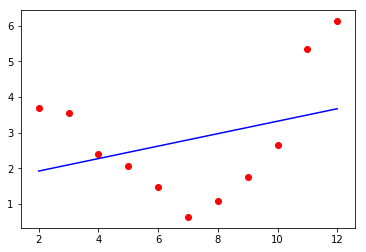

In [18]:
# unscale X for testing
for j in range(n):
    for i in range(m):
        X[i,j] = X[i,j] * scale[j]
#
plt.figure(1)
xmin=np.amin(input,axis=0)
xmax=np.amax(input,axis=0)
xx = np.linspace(xmin[0], xmax[0], num=20)
yy1 = np.array(beta[0] + beta[1] * xx)
plt.plot(xx, yy1.T, 'b')
#plt.scatter(X[:,1], y, 'r')
plt.scatter(input[:,0], input[:,1], color='r') # equivalently
plt.show()   

### quadratic hypothesis
As with our treatment for the normal equation fit, we will change ${\mathbf X}$ to also contain the square of $x$ so that we may fit a quadratic.

After 3000 counts the sum of the squares of the residuals is 11.450
After 6000 counts the sum of the squares of the residuals is 6.241
After 9000 counts the sum of the squares of the residuals is 4.185
After 12000 counts the sum of the squares of the residuals is 3.373
After 15000 counts the sum of the squares of the residuals is 3.052
After 18000 counts the sum of the squares of the residuals is 2.926
After 21000 counts the sum of the squares of the residuals is 2.876
After 24000 counts the sum of the squares of the residuals is 2.856
After 27000 counts the sum of the squares of the residuals is 2.848
After 30000 counts the sum of the squares of the residuals is 2.845
Converged in 30000 iterations
[[  8.01151987]
 [-25.65647717]
 [ 23.79689182]]
[[ 8.01151987]
 [-2.13803976]
 [ 0.16525619]]


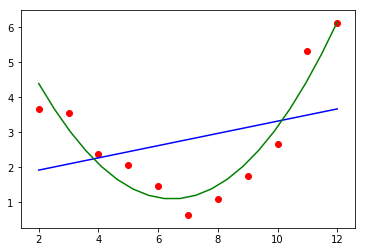

In [19]:
X = np.matrix([np.ones(m), input[:,0], input[:,0]**2]).T
scale = np.array(np.amax(X,axis=0)).T
for j in range(n+1):
    for i in range(m):
        X[i,j] = X[i,j] / scale[j]
beta = np.array([ np.ones(n+1) ]).T
temp = np.array([ np.ones(len(beta)) ]).T

gain = tol + 1.
count = 0
S = 1.
while gain > tol and count < max_iter:
    for i in range(len(beta)):
        temp[i] = beta[i] - alpha/m*np.sum( np.dot( (np.dot( X,beta )-y).T,X[:,i] ) )
        # the above line should be able to be done as a vector difference rather than iterate through i; 
        # that is, we are currently using the ith column of X but we should be able to set that better (?)
    beta = temp
    count = count + 1
    S = np.dot( (np.dot(X,beta)-y).T,np.dot(X,beta)-y )
    gain = abs( (gain - S)/gain )
    if count%3000==0:
        print('After %4d counts the sum of the squares of the residuals is %.3f' % (count, S))
        
print('Converged in %d iterations' % count)
print(beta)
beta = np.divide(beta,scale)
print(beta)

plt.figure(2)
yy2 = np.array( beta[0] + beta[1]*xx + beta[2]*xx**2 )

plt.plot(xx, yy1.T, color='b')
plt.plot(xx, yy2.T, color='g')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()

## Normal Equations
This section fits the same data using linear algebra to solve the minimized system.
### straight line model
First we reset the ${\mathbf X}$ matrix for a simple line fit.

In [20]:
X = np.matrix([np.ones(m), input[:,0]]).T

And the solution for the $\beta$ vector of parameters is simply

In [21]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

For which we can make a plot as before.

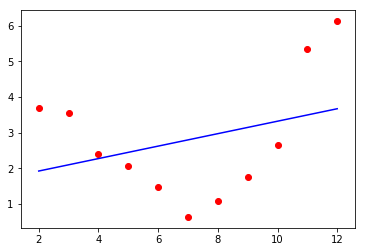

In [22]:
plt.figure(3)
yy3 = np.array(beta[0] + beta[1] * xx)
plt.plot(xx, yy3.T, color='b')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()

### quadratic model
Now we fit a 2nd-degree polynomial by building a different ${\mathbf X}$ matrix. ${\mathbf X}$ as used above is

In [23]:
print(X)

[[  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]]


We instead want to load it such that $x^2$ is its own variable, or "feature."

In [24]:
X = np.matrix([np.ones(m), input[:,0], (input[:,0])**2]).T
print(X)

[[   1.    2.    4.]
 [   1.    3.    9.]
 [   1.    4.   16.]
 [   1.    5.   25.]
 [   1.    6.   36.]
 [   1.    7.   49.]
 [   1.    8.   64.]
 [   1.    9.   81.]
 [   1.   10.  100.]
 [   1.   11.  121.]
 [   1.   12.  144.]]


It is unnecessary to scale the independent variables when solving the system simultaneously (as it was in the algorithm for gradient descent) since their relative magnitudes do not enter the computation. The normal equations for $ y = \beta_0 + \beta_1 x + \beta_2 x^2 $ yield our new fit for which, as usual, the $\beta$ vector ($\hat{\beta}$ on the wikipedia page) is the optimized values of the coefficients.

In [20]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[ 8.07454545]
 [-2.15980186]
 [ 0.16677156]]


Below is the updated plotting code to match. Note that `beta[2]*xx*xx` would not mean $\beta_2x^2$; it must be coded as `beta[2]*xx**2`.

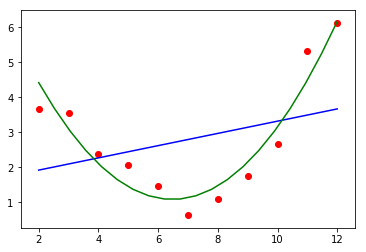

In [21]:
plt.figure(4)
yy4 = np.array( beta[0] + beta[1]*xx + beta[2]*xx**2 )

plt.plot(xx, yy3.T, color='b')
plt.plot(xx, yy4.T, color='g')
plt.scatter(input[:,0], input[:,1], color='r')
plt.show()

For comparison, we reproduce the previous plots alongside the quadratic fits from each of the two methods.

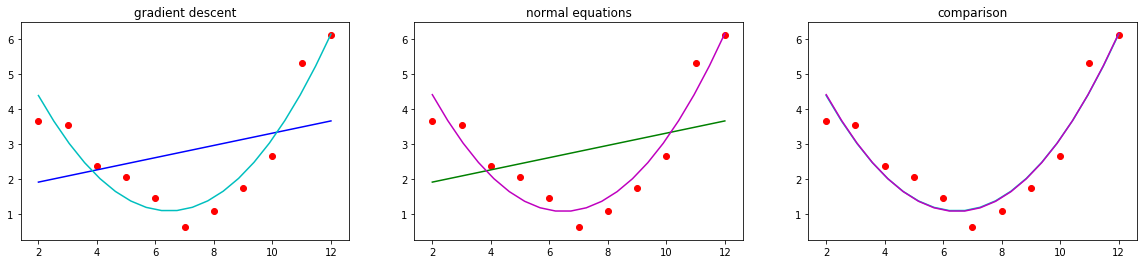

In [22]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 4.0)
plt.figure(5)
plt.subplot(1,3,1)
plt.plot(xx, yy1.T, color='b')
plt.plot(xx, yy2.T, color='c')
plt.scatter(input[:,0], input[:,1], color='r')
plt.title("gradient descent")
plt.subplot(1,3,2)
plt.plot(xx, yy3.T, color='g')
plt.plot(xx, yy4.T, color='m')
plt.scatter(input[:,0], input[:,1], color='r')
plt.title("normal equations")
plt.subplot(1,3,3)
plt.plot(xx, yy2.T, color='c')
plt.plot(xx, yy4.T, color='m')
plt.scatter(input[:,0], input[:,1], color='r')
plt.title("comparison")
plt.show()